<h2 align="center">Text Representation Using TF-IDF</h2>

# What is TF-IDF?

* TF stands for `Term Frequency` and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

            Term Frequency(TF) = [number of times word appeared / total no of words in a document]

* Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.
* IDF stands for `Inverse Document Frequency` and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

            Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

* In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.
* So, `TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)`

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [5]:
v= TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [8]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    print(f"{word}: {v.idf_[indx]}")

already: 2.386294361119891
am: 2.386294361119891
amazon: 2.386294361119891
and: 2.386294361119891
announcing: 1.2876820724517808
apple: 2.386294361119891
are: 2.386294361119891
ate: 2.386294361119891
biryani: 2.386294361119891
dot: 2.386294361119891
eating: 1.9808292530117262
eco: 2.386294361119891
google: 2.386294361119891
grapes: 2.386294361119891
iphone: 2.386294361119891
ironman: 2.386294361119891
is: 1.1335313926245225
loki: 2.386294361119891
microsoft: 2.386294361119891
model: 2.386294361119891
new: 1.2876820724517808
pixel: 2.386294361119891
pizza: 2.386294361119891
surface: 2.386294361119891
tesla: 2.386294361119891
thor: 2.386294361119891
tomorrow: 1.2876820724517808
you: 2.386294361119891


In [9]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [12]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

# Work On E-Commerce Dataset

Dataset: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [127]:
df_balanced = pd.read_csv("Ecommerce_data.csv")
df_balanced.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [128]:
df_balanced.shape

(24000, 2)

In [129]:
df_balanced.isnull().sum()

Text     0
label    0
dtype: int64

In [130]:
df_balanced.shape

(24000, 2)

In [131]:
value_counts = pd.Series(df_balanced["label"].value_counts())
value_counts

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

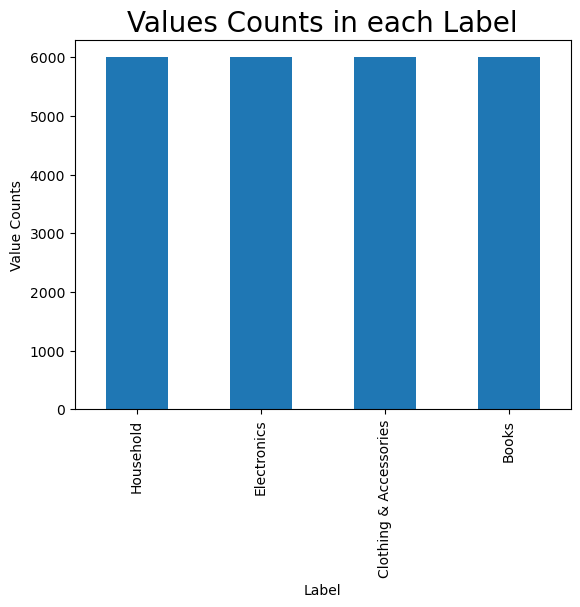

In [132]:
value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Label", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each Label", fontsize=20 )
plt.show()

Here `Household` having more numbers of data, so we need to make tgis imbalanced dataset to balaned one.

**Handle Imbalance**

There are more techniques to this , here we are ussing `under sampling` method.

In [133]:
df_balanced.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

Now it's balanced

In [134]:
df_balanced["label"] = df_balanced.label.replace({"Household": 0, "Books":1, "Electronics":2, "Clothing & Accessories":3})

In [135]:
df_balanced.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,3
4,Indira Designer Women's Art Mysore Silk Saree ...,3


In [136]:
#Train test split

x_train, x_test, y_train, y_test = train_test_split(df_balanced["Text"], df_balanced["label"], test_size=0.2, random_state=52,
                                                    stratify=df_balanced.label)

In [137]:
print("X_train Shape", x_train.shape)
print("x_test Shape", x_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (19200,)
x_test Shape (4800,)
y_train Shape (19200,)
y_test Shape (4800,)


In [138]:
y_train.value_counts()

label
3    4800
1    4800
0    4800
2    4800
Name: count, dtype: int64

In [139]:
y_test.value_counts()

label
2    1200
3    1200
0    1200
1    1200
Name: count, dtype: int64

Perfectly balanced !!!

<h2>KNN Classifier</h2>

In [140]:
knn_model = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier())
    ])

knn_model.fit(x_train, y_train)

y_predict = knn_model.predict(x_test)

In [141]:
print("Classification Report usong KNN:\n", classification_report(y_test, y_predict))

Classification Report usong KNN:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.96      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [142]:
print("Truth:\n",y_test[:5])
print("Predicted:",y_predict[:5])

Truth:
 18162    2
19148    3
11688    0
19768    2
1480     1
Name: label, dtype: int64
Predicted: [2 3 0 2 1]


<h2>Multinomial Naive Bayes</h2>

In [143]:
nb_model = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("KNN", MultinomialNB())
    ])

nb_model.fit(x_train, y_train)

y_predict = nb_model.predict(x_test)

In [144]:
print("Classification Report usong Multinomial Naive Bayes:\n", classification_report(y_test, y_predict))

Classification Report usong Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1200
           1       0.99      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [145]:
print("Truth:\n",y_test[:5])
print("Predicted:",y_predict[:5])

Truth:
 18162    2
19148    3
11688    0
19768    2
1480     1
Name: label, dtype: int64
Predicted: [2 3 0 2 1]


<h2>Random Forest</h2>

In [146]:
rf_model = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("RF", MultinomialNB())
    ])

rf_model.fit(x_train, y_train)

y_predict = rf_model.predict(x_test)

In [147]:
print("Classification Report usong Random Forest:\n", classification_report(y_test, y_predict))

Classification Report usong Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1200
           1       0.99      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [148]:
print("Truth:\n",y_test[:5])
print("Predicted:",y_predict[:5])

Truth:
 18162    2
19148    3
11688    0
19768    2
1480     1
Name: label, dtype: int64
Predicted: [2 3 0 2 1]


<h2 align= "center">Text Pre Process</h2>

In [149]:
nlp =spacy.load("en_core_web_sm")


def preprocess(text):
    """
    Input: Text Data
    Output: Filtred text data which is removed stop words, punctuaions and gtting base word from raw text

    Docstring: Using spacy library by iterating through the raw text , removing stop words ,  punctations & get final lemmtized words
    """
    doc = nlp(text)
    
    filtered_text = []

    for token in doc:
        if token.is_stop and token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [151]:
#create column for filtered text

df_balanced["preprocessed_text"] = df_balanced.Text.apply(preprocess)
df_balanced.head()

,Text,label,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,0,Urban Ladder Eisner low Back Study - Office Co...
1,"Contrast living Wooden Decorative Box,Painted ...",0,"contrast live Wooden Decorative Box , Painted ..."
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2,IO Crest SY - PCI40010 PCI raid Host Controlle...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,3,ISAKAA Baby Socks from just bear to 8 Years- P...
4,Indira Designer Women's Art Mysore Silk Saree ...,3,Indira Designer Women 's Art Mysore Silk Saree...


In [152]:
#Train test split

x_train, x_test, y_train, y_test = train_test_split(df_balanced["preprocessed_text"], df_balanced["label"], test_size=0.2, random_state=52,
                                                    stratify=df_balanced.label)

<h2 align = "center">Model Training after pre processing</h2>

<h2>Random Forest<h2>

In [153]:
rf_model = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("RF", MultinomialNB())
    ])

rf_model.fit(x_train, y_train)

y_predict = rf_model.predict(x_test)

In [154]:
print("Classification Report usong Random Forest:\n", classification_report(y_test, y_predict))

Classification Report usong Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1200
           1       0.98      0.92      0.95      1200
           2       0.96      0.97      0.96      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



<h2>Multinomial Naive Bayes</h2>

In [156]:
nb_model = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("KNN", MultinomialNB())
    ])

nb_model.fit(x_train, y_train)

y_predict = nb_model.predict(x_test)

In [157]:
print("Classification Report usong Multinomial Naive Bayes:\n", classification_report(y_test, y_predict))

Classification Report usong Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1200
           1       0.98      0.92      0.95      1200
           2       0.96      0.97      0.96      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



**Plot confusion matrix**

In [161]:

cm = confusion_matrix(y_test, y_predict)
cm

array([[1169,    6,   14,   11],
       [  58, 1101,   27,   14],
       [  29,   10, 1160,    1],
       [  13,    1,    4, 1182]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

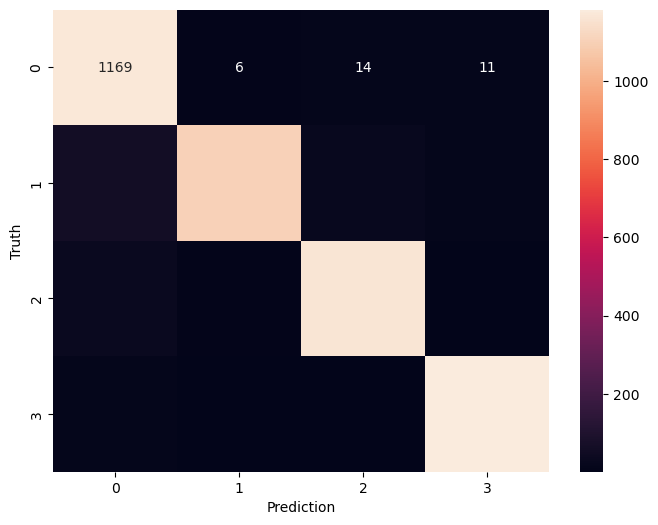

In [166]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')